## Wine Quality Prediction through Randomforest Classifier

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

### Data Collection And Analysis

In [3]:
df = pd.read_csv(r"D:\Machine Learning\ADVANCED ALGORITHMS\Ensemble_method\Bagging + Randomization\Random_Forest\winequality-red.csv")

In [4]:
# Numbers of Rows And Columns In Dataset
df.shape

(1599, 12)

In [5]:
# Printing First 5 Rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Checking If There Is Null Value In Our Dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Statistical Measures Of Dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

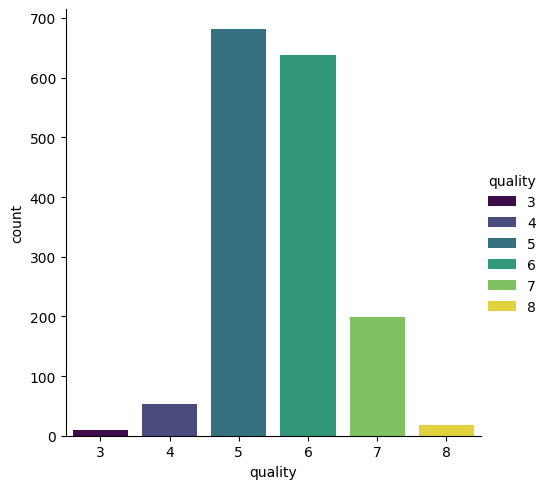

In [9]:
# Number Of Values For Each Quality
sns.catplot(x = 'quality', data = df , kind='count', hue='quality', palette='viridis')

<Axes: xlabel='quality', ylabel='volatile acidity'>

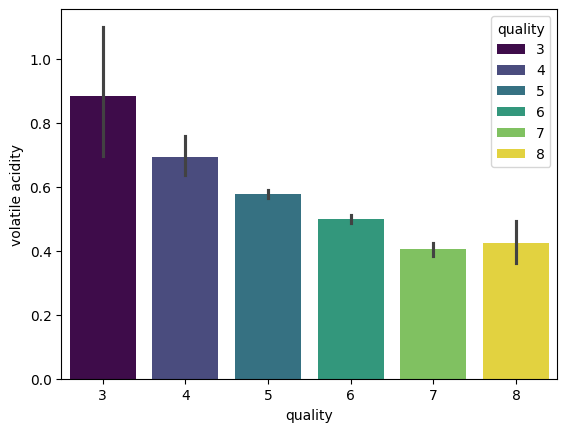

In [10]:
# volatile acidity vs quality
plot = plt.Figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity', data = df, palette='viridis' , hue='quality')

From the above figure : Volatile acidity and quality are inversely proportional to each other

<Axes: xlabel='quality', ylabel='citric acid'>

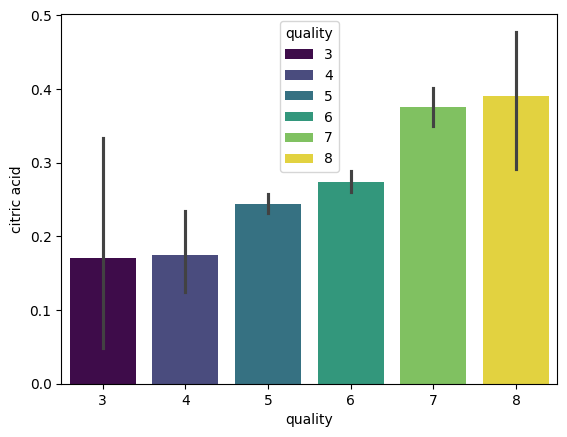

In [11]:
# citric acid vs quality
plot = plt.Figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid', data = df, palette='viridis' , hue='quality')

It is directely Proportional to quality

<Axes: xlabel='quality', ylabel='residual sugar'>

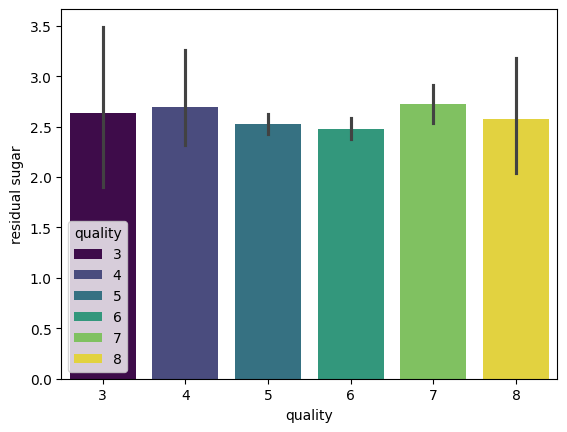

In [12]:
# residual sugar vs quality
plot = plt.Figure(figsize=(5,5))
sns.barplot(x='quality',y='residual sugar', data = df, palette='viridis' , hue='quality')

This is also directely Proportional to quality

#### Now we will check correlation between features


<Axes: >

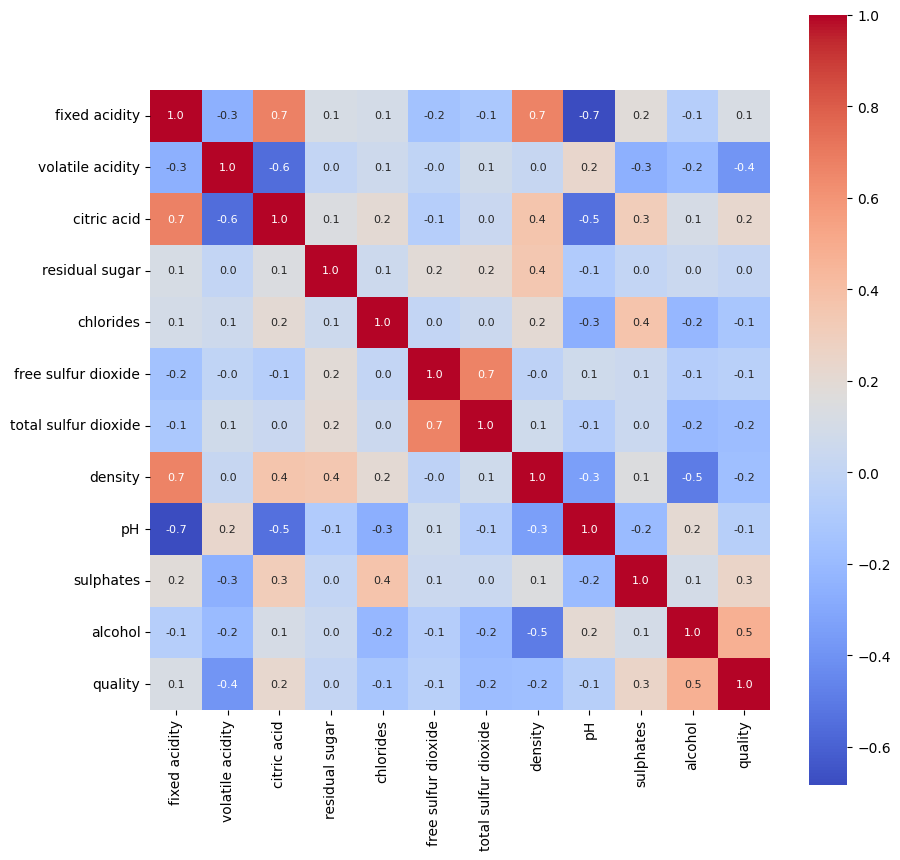

In [13]:
correlation = df.corr()
# constructing a heatmap to understand columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation ,cbar=True, square= True , fmt='.1f' , annot=True , annot_kws={'size':8}, cmap='coolwarm')

#### Data Preprocessing

In [14]:
# seperate the data and labels
x = df.drop('quality' , axis=1)

In [15]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


#### Label binarization

In [16]:
y = df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [18]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

#### TRAIN & TEST SPLIT

In [19]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(y.shape , y_train.shape , y_test.shape)

(1599,) (1279,) (320,)


##### Model Training :

#### RandomForest Classifier

In [21]:
rf = RandomForestClassifier()

In [22]:
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Model Evaluation

### Accuracy Score

In [23]:
# accuracy on test data
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_pred,y_test)

In [24]:
print('Accuracy : ' , accuracy)

Accuracy :  0.903125


#### Building a Predictive System

In [25]:
input_data = (7.2,0.645,0.0,1.9,0.09699999999999999,15.0,39.0,0.99675,3.37,0.58,9.2)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data/numpyarray as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

[0]


c:\Users\hb292\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
